### Source: https://www.kaggle.com/aungpyaeap/supermarket-sales


Context:

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of 
the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

### Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Objective: DATA ANALYSIS

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plot

###### Import dataset

In [2]:
df=pd.read_csv('supermarket_sales.csv')


###### Feature engineering

In [3]:
# Dataset dimensionality
df.shape

(1000, 17)

In [4]:
# Data type of each column
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df = df.set_index('Invoice ID')

In [6]:
# Working in the DATE column
df['date'] = pd.to_datetime(df['Date'])
df['date'].dtype
df['date'] = pd.to_datetime(df['date'])
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
del(df["date"])

In [7]:
# Working in the TIME column
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [8]:
df.drop(['Tax 5%','Total','cogs','Branch','Date','Time'], inplace=True, axis=1)

In [9]:
# Showing the categorical columns
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_columns

['City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [10]:
# There isn't data missing
df.isna().sum()

City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Payment                    0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
month                      0
year                       0
Hour                       0
dtype: int64

In [11]:
df.head(10)

,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,gross margin percentage,gross income,Rating,day,month,year,Hour
Invoice ID,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,4.761905,26.1415,9.1,5,1,2019,13
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,4.761905,3.8200,9.6,8,3,2019,10
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,4.761905,16.2155,7.4,3,3,2019,13
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,4.761905,23.2880,8.4,27,1,2019,20
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,4.761905,30.2085,5.3,8,2,2019,10
699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,Ewallet,4.761905,29.8865,4.1,25,3,2019,18
355-53-5943,Yangon,Member,Female,Electronic accessories,68.84,6,Ewallet,4.761905,20.6520,5.8,25,2,2019,14
315-22-5665,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,Ewallet,4.761905,36.7800,8.0,24,2,2019,11
665-32-9167,Yangon,Member,Female,Health and beauty,36.26,2,Credit card,4.761905,3.6260,7.2,10,1,2019,17


In [12]:
sum(df['gross income'])

15379.369000000002

In [13]:
df.describe()

,Unit price,Quantity,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [14]:
df['month'].unique() 

array([1, 3, 2], dtype=int64)

In [15]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [16]:
df['day'].unique()

array([ 5,  8,  3, 27, 25, 24, 10, 20,  6,  9, 12,  7, 29, 15, 11,  1, 21,
       17,  2, 22, 28, 23,  4, 16, 19, 14, 13, 26, 18, 30, 31],
      dtype=int64)

###### Data visualization

In [52]:
df_gross_income = df[['Product line', 'gross income']].groupby(['Product line'], as_index = False).sum()
df_gross_income['percent'] = (df_gross_income['gross income'] / df_gross_income['gross income'].sum()) * 100
df_gross_income = pd.DataFrame(df_gross_income)
df_gross_income.sort_values(by=['percent'],ascending = False)

# Below we can see that there is no product line that gives much more results than the others.

,Product line,gross income,percent
2,Food and beverages,2673.5640,17.384094
5,Sports and travel,2624.8965,17.067648
0,Electronic accessories,2587.5015,16.824497
1,Fashion accessories,2585.9950,16.814702
4,Home and lifestyle,2564.8530,16.677232
3,Health and beauty,2342.5590,15.231828


In [50]:
df_city = df[['City', 'gross income']].groupby(['City'], as_index = False).sum()
df_city['percent'] = (df_city['gross income'] / df_city['gross income'].sum()) *100
df_city = pd.DataFrame(df_city)
df_city.sort_values(by=['percent'], ascending = False)

# There isn't city that is significantly relevant

,City,gross income,percent
1,Naypyitaw,5265.1765,34.235322
2,Yangon,5057.1605,32.882757
0,Mandalay,5057.0320,32.881921


In [41]:
df_product = df[['Product line', 'Gender', 'Quantity']]
df_product = df_product.groupby(['Product line', 'Gender'], as_index = False).sum()
df_product

,Product line,Gender,Quantity
0,Electronic accessories,Female,488
1,Electronic accessories,Male,483
2,Fashion accessories,Female,530
3,Fashion accessories,Male,372
4,Food and beverages,Female,514
5,Food and beverages,Male,438
6,Health and beauty,Female,343
7,Health and beauty,Male,511
8,Home and lifestyle,Female,498
9,Home and lifestyle,Male,413


In [20]:
df_revenue_city = df.groupby('City').agg([np.sum, np.median, np.mean])
df_revenue_city[['gross income']].T

City                    Mandalay    Naypyitaw       Yangon
gross income sum     5057.032000  5265.176500  5057.160500
             median    12.042000    12.924750    11.468000
             mean      15.232024    16.052367    14.874001

<AxesSubplot:xlabel='City', ylabel='count'>

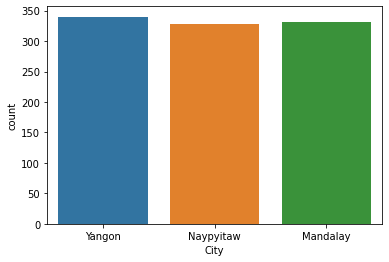

In [21]:
# Quantity sales by city
sns.countplot(x="City", data=df)

<AxesSubplot:xlabel='count', ylabel='Product line'>

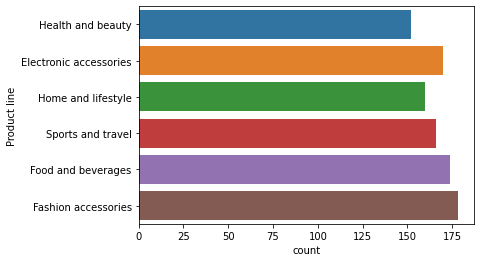

In [22]:
# Quantidade de vendas por linha de produto
sns.countplot(y="Product line", data=df)

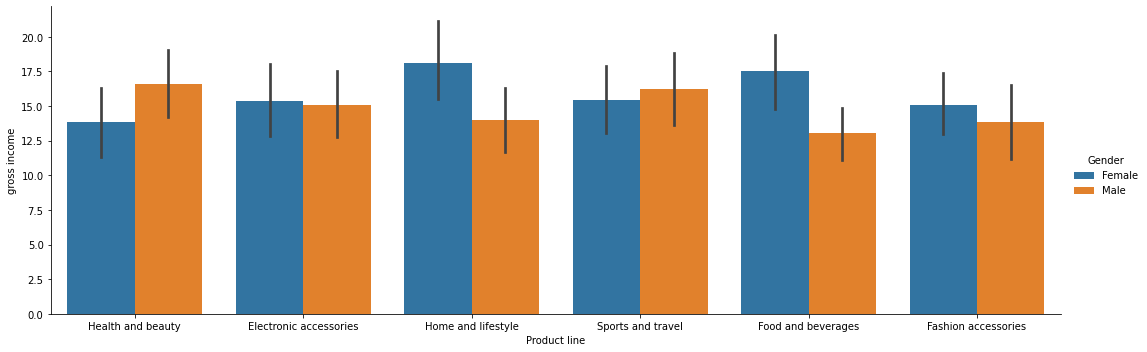

In [23]:
sns.catplot(x='Product line',y='gross income',hue='Gender',data=df, kind = 'bar', aspect = 3 )

<AxesSubplot:xlabel='Gender', ylabel='count'>

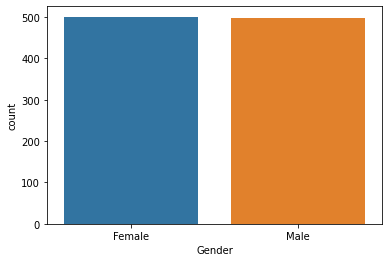

In [24]:
# Quantidade de vendas por gênero
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

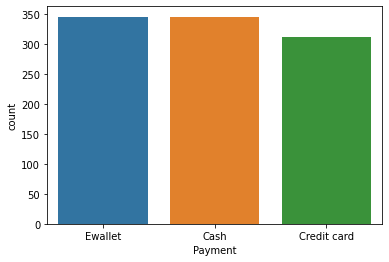

In [25]:
# Quantidade de vendas por tipo de pagamento
sns.countplot(x='Payment', data=df)

<AxesSubplot:xlabel='month', ylabel='gross income'>

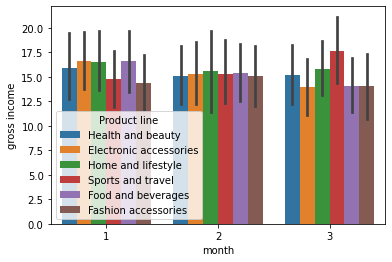

In [26]:
# Vendas por mês
sns.barplot(x="month", y="gross income", hue="Product line", data=df)

<AxesSubplot:xlabel='Hour', ylabel='gross income'>

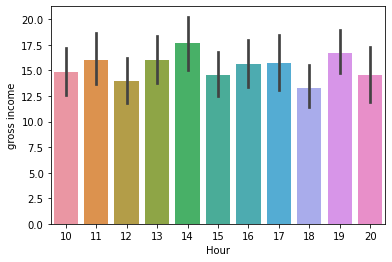

In [27]:
# Vendas por hora do dia
sns.barplot(x='Hour',y='gross income',data=df)

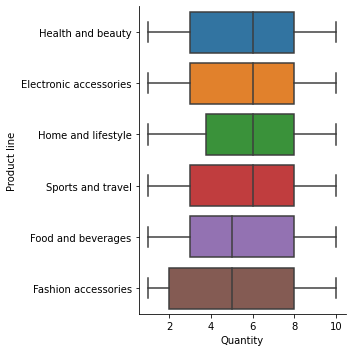

In [28]:
sns.catplot(y="Product line", x="Quantity", kind="box", data=df)

In [29]:
df_corr = df[['Unit price', 'Quantity', 'gross margin percentage', 'gross income', 'Rating']]
np.round(df_corr.corr(method = 'pearson'),5)

,Unit price,Quantity,gross margin percentage,gross income,Rating
Unit price,1.00000,0.01078,-0.0,0.63396,-0.00878
Quantity,0.01078,1.00000,-0.0,0.70551,-0.01581
gross margin percentage,-0.00000,-0.00000,1.0,0.00000,0.00000
gross income,0.63396,0.70551,0.0,1.00000,-0.03644
Rating,-0.00878,-0.01581,0.0,-0.03644,1.00000


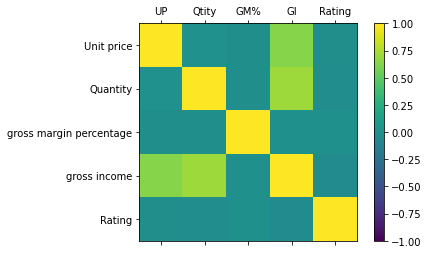

In [30]:
correlations = df_corr.corr()
colunas1 = ['Unit price', 'Quantity', 'gross margin percentage', 'gross income', 'Rating']
colunas2 = ['UP', 'Qtity', 'GM%', 'GI', 'Rating']

# Plot
fig = plot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 5, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas2)
ax.set_yticklabels(colunas1)
plot.show()

In [31]:
df_corr.skew()

Unit price                 0.007077
Quantity                   0.012941
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

<AxesSubplot:xlabel='day', ylabel='gross income'>

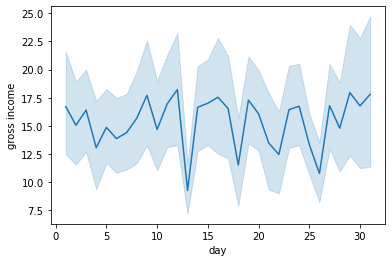

In [32]:
sns.lineplot(x='day',y='gross income', data=df)

###### THANK YOU